In [1]:
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
### Importando datos resultantes de los modelos

#HadGEM
HadGEM_histo=xr.open_dataset("cal_historical_HADGEM.nc")
HadGEM_ssp585=xr.open_dataset("cal_ssp585_HADGEM.nc")

#GFDL
GFDL_histo=xr.open_dataset("cal_historical_GFDL.nc")
GFDL_ssp585=xr.open_dataset("cal_ssp585_GFDL.nc")

In [3]:
#Seleccionando las variables

#Histórico, HADGEM
Had_TW_histo=HadGEM_histo.Tw
Had_T_histo=HadGEM_histo.T
Had_q_histo=HadGEM_histo.SH

#Histórico, GFDL
GFDL_TW_histo=GFDL_histo.Tw
GFDL_T_histo=GFDL_histo.T
GFDL_q_histo=GFDL_histo.SH

#ssp585, HADGEM
Had_TW_ssp585=HadGEM_ssp585.Tw
Had_T_ssp585=HadGEM_ssp585.T
Had_q_ssp585=HadGEM_ssp585.SH

#ssp585, GFDL
GFDL_TW_ssp585=GFDL_ssp585.Tw
GFDL_T_ssp585=GFDL_ssp585.T
GFDL_q_ssp585=GFDL_ssp585.SH


In [4]:
#Función para la serie de tiempo
def serieT(variable,unidades=0):
    ar=variable.resample(time="Y").mean("time")  
    ar=ar.mean(["time"])-unidades
    return ar

In [5]:
#Realizando la serie de tiempo para el escenario historico
#HadGEM
seHAD_TW=serieT(Had_TW_histo,unidades=273.15)
seHAD_T=serieT(Had_T_histo,unidades=273.15)
seHAD_q=serieT(Had_q_histo,unidades=0)

#GFDL
seGF_TW=serieT(GFDL_TW_histo,unidades=273.15)
seGF_T=serieT(GFDL_T_histo,unidades=273.15)
seGF_q=serieT(GFDL_q_histo,unidades=0)

In [6]:
#Realizando la serie de tiempo para el escenario ssp585

#HadGEM
seHAD_TWs=serieT(Had_TW_ssp585,unidades=273.15)
seHAD_Ts=serieT(Had_T_ssp585,unidades=273.15)
seHAD_qs=serieT(Had_q_ssp585,unidades=0)

#GFDL
seGF_TWs=serieT(GFDL_TW_ssp585,unidades=273.15)
seGF_Ts=serieT(GFDL_T_ssp585,unidades=273.15)
seGF_qs=serieT(GFDL_q_ssp585,unidades=0)

In [7]:
datos=[seHAD_T,seHAD_q*1000,seHAD_TW,seGF_T,seGF_q*1000,seGF_TW]
colors=["YlOrRd","PuBu","Reds","YlOrRd","PuBu","Reds"]
name=["$T_{mean}$ [$^{\circ}$C]","$SH_{mean}$ [$g/kg$]","$T_{Wmean}$ [$^{\circ}$C]","$T_{mean}$ [$^{\circ}$C]","$SH_{mean}$ [$^{\circ}$C]","$T_{mean}$ [$^{\circ}$C]"]
inc=["a)histórico","b)","c)","d)","e)","f)"]

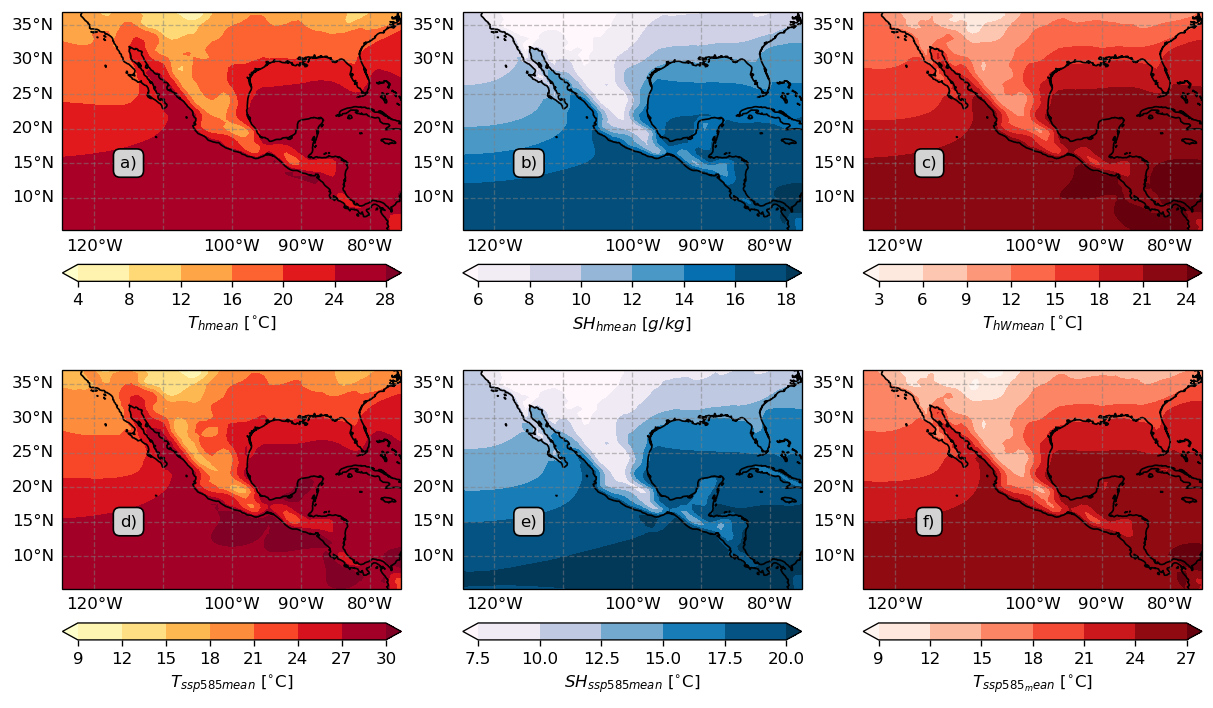

In [8]:
fig = plt.figure(figsize=(10, 7),dpi=120)
# definimos los levelss del mapa de colores
#levelss=np.arange(0,11)
for idata,data in enumerate(datos):
    # seleccionar la estacion
    models=data
    # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
    ax = fig.add_subplot(2, 3, 1+idata, projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # grafico de contorno
    cs=ax.contourf(data.longitude,data.latitude,models,cmap=colors[idata],extend='both',transform=ccrs.PlateCarree())
    ## arreglando el plot
    # extension del mapa
    #ax.set_extent([235,300.1, 5,42], crs=ccrs.PlateCarree())
    # lineas de paralelos
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False# It should turn off the upper x ticks
    gl.top_labels = gl.right_labels = False
    # colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,pad=0.09)
    cbar.ax.set_xlabel(name[idata])
    # Agregamos un inciso dentro de la gráfica con fondo y borde
    plt.text(-115, 15, inc[idata], fontsize=10, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
    # titulo del plot
    #plt.title(np.array(data[idata]),fontsize=14)
# ultimo arreglo, apretar el mapa
plt.tight_layout(h_pad=0,pad=0.3)
plt.subplots_adjust(top=0.9)
#fig.suptitle("HadGEM vs ERA5",fontsize=12);
#plt.savefig("ERA_Map.svg",bbox_inches="tight")

In [9]:
datos=[seHAD_Ts,seHAD_qs*1000,seHAD_TWs,seGF_Ts,seGF_qs*1000,seGF_TWs]
colors=["YlOrRd","PuBu","Reds","YlOrRd","PuBu","Reds"]
name=["$T_{hmean}$ [$^{\circ}$C]","$SH_{hmean}$ [$g/kg$]","$T_{hWmean}$ [$^{\circ}$C]","$T_{ssp585mean}$ [$^{\circ}$C]","$SH_{ssp585mean}$ [$^{\circ}$C]","$T_{ssp585_mean}$ [$^{\circ}$C]"]
inc=["a)","b)","c)","d)","e)","f)"]

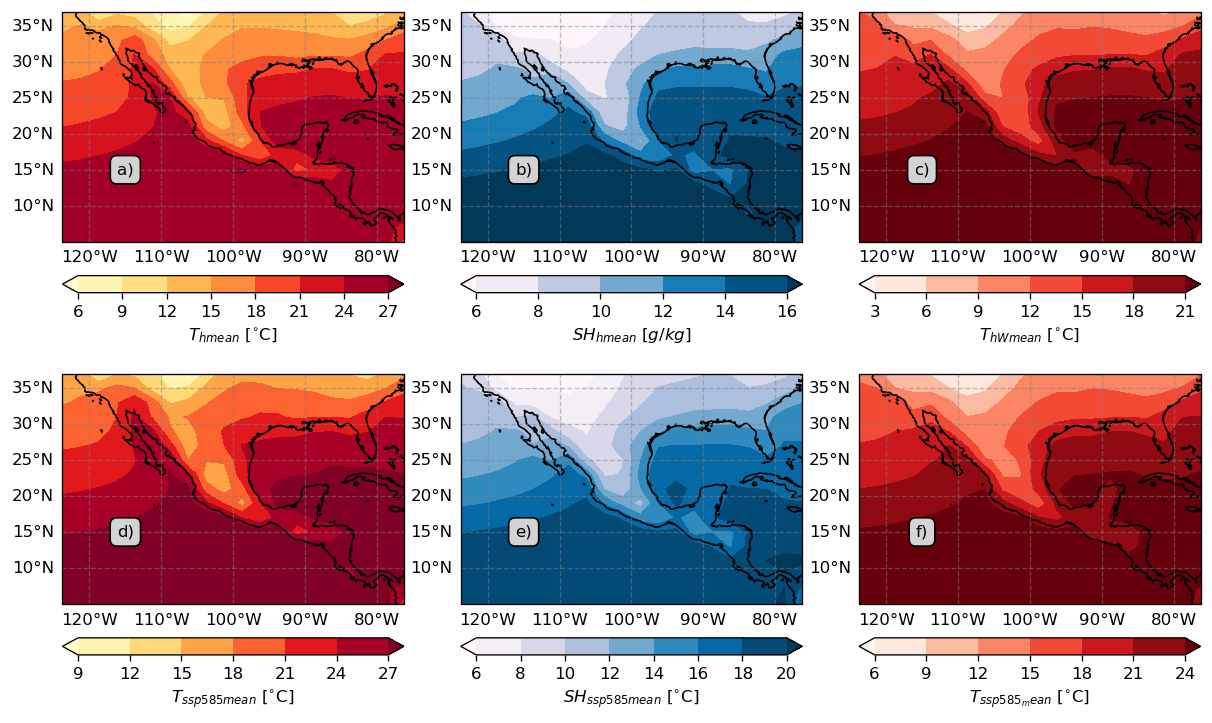

In [10]:
fig = plt.figure(figsize=(10, 7),dpi=120)
# definimos los levelss del mapa de colores
#levelss=np.arange(0,11)
for idata,data in enumerate(datos):
    # seleccionar la estacion
    models=data
    # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
    ax = fig.add_subplot(2, 3, 1+idata, projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # grafico de contorno
    cs=ax.contourf(data.longitude,data.latitude,models,cmap=colors[idata],extend='both',transform=ccrs.PlateCarree())
    ## arreglando el plot
    # extension del mapa
    #ax.set_extent([235,300.1, 5,42], crs=ccrs.PlateCarree())
    # lineas de paralelos
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False# It should turn off the upper x ticks
    gl.top_labels = gl.right_labels = False
    # colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,pad=0.09)
    cbar.ax.set_xlabel(name[idata])
    # Agregamos un inciso dentro de la gráfica con fondo y borde
    plt.text(-115, 15, inc[idata], fontsize=10, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
    # titulo del plot
    #plt.title(np.array(data[idata]),fontsize=14)
# ultimo arreglo, apretar el mapa
plt.tight_layout(h_pad=0,pad=0.3)
plt.subplots_adjust(top=0.9)
#fig.suptitle("HadGEM vs ERA5",fontsize=12);
#plt.savefig("ERA_Map.svg",bbox_inches="tight")

In [11]:
def figserie(data1,data2,label1,label2,ylabel,legend=False):
    plt.plot(data1.time.dt.year,data1,label=label1)
    plt.plot(data2.time.dt.year,data2,label=label2)
    plt.ylabel(ylabel)
    plt.grid(linestyle="--",alpha=0.5,c="gray")
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)
    
    

AttributeError: 'DataArray' object has no attribute 'time'

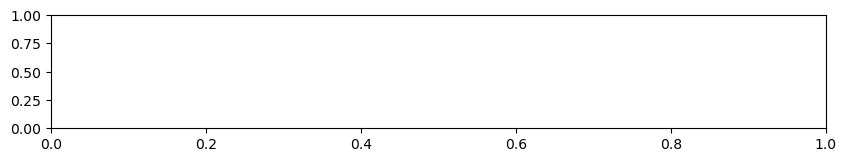

In [12]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3,1,1)
figserie(seHAD_TW,seGF_TW,"HadGEMhisto","GFDLhisto","$T_{W}$ [$^{\circ}$C]",legend=True)
figserie(seHAD_TWs,seGF_TWs,"HadGEMssp585","GFDLssp585","$T_{W}$ [$^{\circ}$C]",legend=True)

plt.subplot(3,1,2)
figserie(seHAD_T,seGF_T,"HadGEMhisto","GFDLhisto","$T$ [$^{\circ}$C]",legend=False)
figserie(seHAD_Ts,seGF_Ts,"HadGEMssp585","GFDLssp585","$T$ [$^{\circ}$C]",legend=False)


plt.subplot(3,1,3)
figserie(seHAD_q,seGF_q,"HadGEMhisto","GFDLhisto","$q$ [$kg/kg$]",legend=False)
figserie(seHAD_qs,seGF_qs,"HadGEMssp585","GFDLssp585","$q$ [$kg/kg$]",legend=False)

plt.tight_layout()

In [ ]:
#Función para el ciclo anual
def ciclo(variable,unidades=None):#Elige la opción de acuerdo a los tipos de datos 0=HadISD, 1=ERA

    ciclo=variable.groupby("time.month").mean()
    ciclo=ciclo.mean(["lat","lon"])-unidades
    return ciclo


In [ ]:
#Corriendo la función para cada ciclo anual

#historical, HadGEM
ciclo_tw_H=ciclo(Had_TW_histo,unidades=273.15)
ciclo_t_H=ciclo(Had_T_histo,unidades=273.15)
ciclo_q_H=ciclo(Had_q_histo,unidades=0)

#historical, GFDL
ciclo_tw_G=ciclo(GFDL_TW_histo,unidades=273.15)
ciclo_t_G=ciclo(GFDL_T_histo,unidades=273.15)
ciclo_q_G=ciclo(GFDL_q_histo,unidades=0)

#ssp585, HadGEM
ciclo_tw_Hs=ciclo(Had_TW_ssp585,unidades=273.15)
ciclo_t_Hs=ciclo(Had_T_ssp585,unidades=273.15)
ciclo_q_Hs=ciclo(Had_q_ssp585,unidades=0)

#ssp585,GFDL
ciclo_tw_Gs=ciclo(GFDL_TW_ssp585,unidades=273.15)
ciclo_t_Gs=ciclo(GFDL_T_ssp585,unidades=273.15)
ciclo_q_Gs=ciclo(GFDL_q_ssp585,unidades=0)

In [ ]:
def figciclo(data1,data2,label1,label2,ylabel,linestyle="-",legend=False):
    meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
    plt.plot(meses,data1,label=label1,linestyle=linestyle)
    plt.plot(meses,data2,label=label2,linestyle=linestyle)
    plt.ylabel(ylabel)
    plt.grid(linestyle="--",alpha=0.5,c="gray")
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)
       

In [ ]:
fig = plt.figure(figsize=(5, 6))

plt.subplot(3,1,1)
figciclo(ciclo_tw_H,ciclo_tw_G,"HadGEMhisto","GFDLhisto","$T_{W}$ [$^{\circ}$C]",linestyle="-",legend=True)
figciclo(ciclo_tw_Hs,ciclo_tw_Gs,"HadGEMssp585","GFDLssp585","$T_{W}$ [$^{\circ}$C]",linestyle="--",legend=True)

plt.subplot(3,1,2)
figciclo(ciclo_t_H,ciclo_t_G,"HadGEMhisto","GFDLhisto","$T$ [$^{\circ}$C]",linestyle="-",legend=False)
figciclo(ciclo_t_Hs,ciclo_t_Gs,"HadGEMssp585","GFDLssp585","$T$ [$^{\circ}$C]",linestyle="--",legend=False)

plt.subplot(3,1,3)
figciclo(ciclo_q_H,ciclo_q_G,"HadGEMhisto","GFDLhisto","$q$ [$kg/kg$]",linestyle="-",legend=False)
figciclo(ciclo_q_Hs,ciclo_q_Gs,"HadGEMssp585","GFDLssp585","$q$ [$kg/kg$]",linestyle="--",legend=False)

plt.tight_layout()

In [ ]:
#ciclo estacional
def estacion1(variable,unidades=None):
    
    ciclo=variable.groupby("time.season").mean("time")-unidades
    return ciclo


In [ ]:
#Corriendo la función para cada ciclo estacional

#historical, HadGEM
esta_tw_H=estacion1(Had_TW_histo,unidades=273.15)
esta_t_H=estacion1(Had_T_histo,unidades=273.15)
esta_q_H=estacion1(Had_q_histo,unidades=0)

#historical, GFDL
esta_tw_G=estacion1(GFDL_TW_histo,unidades=273.15)
esta_t_G=estacion1(GFDL_T_histo,unidades=273.15)
esta_q_G=estacion1(GFDL_q_histo,unidades=0)

#ssp585, HadGEM
esta_tw_Hs=estacion1(Had_TW_ssp585,unidades=273.15)
esta_t_Hs=estacion1(Had_T_ssp585,unidades=273.15)
esta_q_Hs=estacion1(Had_q_ssp585,unidades=0)

#ssp585,GFDL
esta_tw_Gs=estacion1(GFDL_TW_ssp585,unidades=273.15)
esta_t_Gs=estacion1(GFDL_T_ssp585,unidades=273.15)
esta_q_Gs=estacion1(GFDL_q_ssp585,unidades=0)

In [ ]:
def figesta(data,cmap,xlabel,title):
    seasonM=[data[0],data[2],data[1],data[3]]
    fig = plt.figure(figsize=(10, 7),dpi=120)
# definimos los levelss del mapa de colores
    #levelss=np.arange(0,11)
    for iseason,season in enumerate(seasonM):
        # seleccionar la estacion
        promedio_estacional=seasonM[iseason]
        # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
        ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
        # agregamos lineas costeras
        ax.coastlines()
        # grafico de contorno
        cs=ax.contourf(seasonM[iseason].lon,seasonM[iseason].lat,promedio_estacional,cmap=cmap,extend='both',transform=ccrs.PlateCarree())
        ## arreglando el plot
        # extension del mapa
       # ax.set_extent([235,300.1, 5,42], crs=ccrs.PlateCarree())
        # lineas de paralelos
        gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
        ax.xlabels_top = False# It should turn off the upper x ticks
        gl.top_labels = gl.right_labels = False
        # colorbar
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
        cbar.ax.set_xlabel(xlabel)
        # titulo del plot
        plt.title(np.array(seasonM[iseason].season),fontsize=14)
    # ultimo arreglo, apretar el mapa
    plt.tight_layout(h_pad=0.5,pad=0.5)
    plt.subplots_adjust(top=0.925)
    fig.suptitle(title,fontsize=14);

In [ ]:
#Mapas estacionales del escenario histórico
figesta(esta_tw_H,"Reds",xlabel="$T{W}$ [$^{\circ}$C]",title="$T_{W}$ historical")

In [ ]:
#Mapas estacionales del escenario ssp585
figesta(esta_tw_Hs,"Reds",xlabel="$T{W}$ [$^{\circ}$C]",title="$T_{W}$ ssp585")

In [ ]:
#Mapas estacionales del escenario histórico
figesta(esta_t_H,"YlOrRd",xlabel="$T$ [$^{\circ}$C]",title="$T$ historical")

In [ ]:
#Mapas estacionales del escenario histórico
figesta(esta_t_Hs,"YlOrRd",xlabel="$T$ [$^{\circ}$C]",title="$T$ ssp585")

In [ ]:
#Mapas estacionales del escenario histórico
figesta(esta_q_H,"PuBu",xlabel="$q$ [$kg/kg$]",title="$q$ historical")

In [ ]:
#Mapas estacionales del escenario histórico
figesta(esta_q_Hs,"PuBu",xlabel="$q$ [$kg/kg$]",title="$q$ ssp585")

In [ ]:
#ciclo estacional
def estacion2(variable,unidades=None):
    
    ciclo=variable.groupby("time.season").mean("time")
    ciclo=ciclo.mean(["lat","lon"])-unidades
    return ciclo

In [ ]:
#Corriendo la función para cada ciclo estacional

#historical, HadGEM
esta_tw_H=estacion2(Had_TW_histo,unidades=273.15)
esta_t_H=estacion2(Had_T_histo,unidades=273.15)
esta_q_H=estacion2(Had_q_histo,unidades=0)

#historical, GFDL
esta_tw_G=estacion2(GFDL_TW_histo,unidades=273.15)
esta_t_G=estacion2(GFDL_T_histo,unidades=273.15)
esta_q_G=estacion2(GFDL_q_histo,unidades=0)

#ssp585, HadGEM
esta_tw_Hs=estacion2(Had_TW_ssp585,unidades=273.15)
esta_t_Hs=estacion2(Had_T_ssp585,unidades=273.15)
esta_q_Hs=estacion2(Had_q_ssp585,unidades=0)

#ssp585,GFDL
esta_tw_Gs=estacion2(GFDL_TW_ssp585,unidades=273.15)
esta_t_Gs=estacion2(GFDL_T_ssp585,unidades=273.15)
esta_q_Gs=estacion2(GFDL_q_ssp585,unidades=0)

In [ ]:
def figestac(data1,data2,label1,label2,ylabel,linestyle="-",legend=False):
    plt.plot(data1.season,data1,label=label1,linestyle=linestyle)
    plt.plot(data1.season,data2,label=label2,linestyle=linestyle)
    plt.ylabel(ylabel)
    plt.grid(linestyle="--",alpha=0.5,c="gray")
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8,ncol=2)
       

In [ ]:
fig = plt.figure(figsize=(5, 6))

plt.subplot(3,1,1)
figestac(esta_tw_H,esta_tw_G,"HadGEMhisto","GFDLhisto","$T_{W}$ [$^{\circ}$C]",linestyle="-",legend=True)
figestac(esta_tw_Hs,esta_tw_Gs,"HadGEMssp585","GFDLssp585","$T_{W}$ [$^{\circ}$C]",linestyle="--",legend=True)

plt.subplot(3,1,2)
figestac(esta_t_H,esta_t_G,"HadGEMhisto","GFDLhisto","$T$ [$^{\circ}$C]",linestyle="-",legend=False)
figestac(esta_t_Hs,esta_t_Gs,"HadGEMssp585","GFDLssp585","$T$ [$^{\circ}$C]",linestyle="--",legend=False)

plt.subplot(3,1,3)
figestac(esta_q_H,esta_q_G,"HadGEMhisto","GFDLhisto","$q$ [$kg/kg$]",linestyle="-",legend=False)
figestac(esta_q_Hs,esta_q_Gs,"HadGEMssp585","GFDLssp585","$q$ [$kg/kg$]",linestyle="--",legend=False)

plt.tight_layout()

In [ ]:
#Sacando las coordenadas
lon=Had_TW_histo.lon
lats=Had_TW_histo.lat

In [ ]:
data=[Had_TW_histo-273.15,GFDL_TW_histo-273.15,Had_T_histo-273.15,GFDL_T_histo-273.15,Had_q_histo,GFDL_q_histo]
colors=["Reds","Reds","YlOrRd","YlOrRd","PuBu","PuBu"]
name=["$T_{W}$ [$^{\circ}$C]","$T_{W}$ [$^{\circ}$C]","$T$ [$^{\circ}$C]","$T$ [$^{\circ}$C]","$q$ [$kg/kg$]","$q$ [$kg/kg$]"]

In [ ]:
fig = plt.figure(figsize=(15, 5),dpi=120)
# definimos los levelss del mapa de colores
#levelss=np.arange(0,11)
for idata,data in enumerate(data):
    # seleccionar la estacion
    models=data[idata]
    # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
    ax = fig.add_subplot(3, 2, 1+idata, projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    # grafico de contorno
    cs=ax.contourf(data[idata].lon,data[idata].lat,models,cmap=colors[idata],extend='both',transform=ccrs.PlateCarree())
    ## arreglando el plot
    # extension del mapa
    #ax.set_extent([235,300.1, 5,42], crs=ccrs.PlateCarree())
    # lineas de paralelos
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False# It should turn off the upper x ticks
    gl.top_labels = gl.right_labels = False
    # colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel(name[idata])
    # titulo del plot
    #plt.title(np.array(data[idata]),fontsize=14)
# ultimo arreglo, apretar el mapa
plt.tight_layout(h_pad=2,pad=0.6)
plt.subplots_adjust(top=0.925)
fig.suptitle("HadGEM vs ERA5",fontsize=12);

In [ ]:
#HadGEM dif
diff_Tw_HAD=(Had_TW_ssp585.where(Had_TW_ssp585.time.dt.year>1969,drop=True)).mean("time")-(Had_TW_histo.where(Had_TW_histo.time.dt.year>1983,drop=True)).mean("time")

In [ ]:
diff_Tw_HAD